# **PROYECTO CICADA** 👨‍🎓


Coffee Quality database
These datasets are gathered from Coffee Quality Institute (CQI) in January, 2018.
I'm not the Owner of the Datasets, nor scrapping was performed by me. It was done in this GitHub's repo and owned by [Jame LeDoux](https://github.com/jldbc/coffee-quality-database) repo.

In [1]:
# Step 0. Import libraries and custom modules
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
# Machine learning -----------------------------------------------------
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
# Metrics --------------------------------------------------------------
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
# Exporting ------------------------------------------------------------
import pickle

In [2]:
# Step 1. Read the dataset

url = 'https://raw.githubusercontent.com/rfordatascience/' + \
'tidytuesday/master/data/2020/2020-07-07/coffee_ratings.csv'
df_raw = pd.read_csv(url)
df_raw.to_csv('/content/coffee.csv')
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1339 entries, 0 to 1338
Data columns (total 43 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   total_cup_points       1339 non-null   float64
 1   species                1339 non-null   object 
 2   owner                  1332 non-null   object 
 3   country_of_origin      1338 non-null   object 
 4   farm_name              980 non-null    object 
 5   lot_number             276 non-null    object 
 6   mill                   1021 non-null   object 
 7   ico_number             1182 non-null   object 
 8   company                1130 non-null   object 
 9   altitude               1113 non-null   object 
 10  region                 1280 non-null   object 
 11  producer               1107 non-null   object 
 12  number_of_bags         1339 non-null   int64  
 13  bag_weight             1339 non-null   object 
 14  in_country_partner     1339 non-null   object 
 15  harv

In [3]:
# Get a sample
df_raw.sample(10)

,total_cup_points,species,owner,country_of_origin,farm_name,lot_number,mill,ico_number,company,altitude,...,color,category_two_defects,expiration,certification_body,certification_address,certification_contact,unit_of_measurement,altitude_low_meters,altitude_high_meters,altitude_mean_meters
445,83.17,Arabica,juan luis alvarado romero,Guatemala,finca medina,11/11711/58,beneficio siembras vision (154),11/11711/58,"siembras vision, s.a.",1500,...,Green,3,"May 23rd, 2017",Asociacion Nacional Del Café,b1f20fe3a819fd6b2ee0eb8fdc3da256604f1e53,724f04ad10ed31dbb9d260f0dfd221ba48be8a95,m,1500.00,1500.00,1500.00
1274,75.58,Arabica,juan luis alvarado romero,Guatemala,agropecuaria quiagral,NaN,beneficio ixchel,11/23/0768,"unex guatemala, s.a.",4300,...,Green,15,"July 9th, 2013",Asociacion Nacional Del Café,b1f20fe3a819fd6b2ee0eb8fdc3da256604f1e53,724f04ad10ed31dbb9d260f0dfd221ba48be8a95,ft,1310.64,1310.64,1310.64
537,82.92,Arabica,cqi taiwan icp cqi台灣合作夥伴,Ethiopia,-,none,NaN,010/0357/0085,belayneh kindie,2000,...,Bluish-Green,20,"February 25th, 2017",Blossom Valley International,fc45352eee499d8470cf94c9827922fb745bf815,de73fc9412358b523d3a641501e542f31d2668b0,m,2000.00,2000.00,2000.00
1337,75.08,Robusta,cafe politico,India,NaN,NaN,NaN,14-1118-2014-0087,cafe politico,NaN,...,Green,1,"August 25th, 2015",Specialty Coffee Association,ff7c18ad303d4b603ac3f8cff7e611ffc735e720,352d0cf7f3e9be14dad7df644ad65efc27605ae2,m,NaN,NaN,NaN
70,85.42,Arabica,assefa belay coffee producer,Ethiopia,NaN,NaN,NaN,2015,assefa belay coffee producer,1800-2000,...,Green,18,"March 30th, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1800.00,2000.00,1900.00
1325,81.50,Robusta,ankole coffee producers coop,Uganda,kyangundu coop society,NaN,ankole coffee producers coop union ltd,0,ankole coffee producers coop,1488,...,Green,2,"July 14th, 2015",Uganda Coffee Development Authority,e36d0270932c3b657e96b7b0278dfd85dc0fe743,03077a1c6bac60e6f514691634a7f6eb5c85aae8,m,1488.00,1488.00,1488.00
1229,78.33,Arabica,pablo cervantes morelos,Mexico,llano hermoso,NaN,"llano hermoso, xochitonalco huautla, oaxaca",0,asociación agricola local de productores de ca...,1300,...,Green,47,"September 11th, 2013",AMECAFE,3e18a5ae6f5e2aabca37e025f94e1974558bf5f0,e3212d17882b7657b3fba559b4072e552604d5d1,m,1300.00,1300.00,1300.00
472,83.17,Arabica,nucoffee,Brazil,são francisco da serra,NaN,NaN,002/1251/0245,nucoffee,950m,...,Green,4,"February 16th, 2013",NUCOFFEE,567f200bcc17a90070cb952647bf88141ad9c80c,aa2ff513ffb9c844462a1fb07c599bce7f3bb53d,m,950.00,950.00,950.00
792,82.08,Arabica,kona pacific farmers cooperative,United States (Hawaii),NaN,NaN,NaN,2200302,cqi,NaN,...,Green,2,"February 22nd, 2013",Specialty Coffee Association,36d0d00a3724338ba7937c52a378d085f2172daa,0878a7d4b9d35ddbf0fe2ce69a2062cceb45a660,ft,NaN,NaN,NaN
935,81.42,Arabica,juan luis alvarado romero,Guatemala,nueva granada,11/326/14,beneficio nueva granada,11/326/14,"agricola nueva granada, s.a.",4500,...,Green,0,"March 17th, 2017",Asociacion Nacional Del Café,b1f20fe3a819fd6b2ee0eb8fdc3da256604f1e53,724f04ad10ed31dbb9d260f0dfd221ba48be8a95,ft,1371.60,1371.60,1371.60


# EDA

## Select features

There is data for Arabica and Robusta beans, in many countries and professionally rated on a scale of 0 to 100. All sorts of scores/ratings for things like acidity, sweetness, fragrance, balance, etc., can be useful for separating displays/categories or for modeling/recommending.


In [4]:
# Select features
df_interim = df_raw.copy()
df_interim = df_interim[['total_cup_points',
                            'species',
                            'country_of_origin',
                            'variety',
                            'aroma',
                            'aftertaste',
                            'acidity',
                            'body',
                            'balance',
                            'sweetness',
                            'altitude_mean_meters',
                            'moisture']] #criterio algunos datos son irrelevante para la predicción 
df_interim = df_interim.dropna()

In [5]:
# Get a sample
df_interim.sample(10)

,total_cup_points,species,country_of_origin,variety,aroma,aftertaste,acidity,body,balance,sweetness,altitude_mean_meters,moisture
258,83.92,Arabica,Brazil,Bourbon,7.50,7.58,7.50,7.58,7.50,10.0,890.0,0.00
1096,80.25,Arabica,Mexico,Caturra,7.25,7.00,7.33,7.33,7.00,10.0,1600.0,0.10
835,81.83,Arabica,Brazil,Mundo Novo,7.42,7.42,7.50,7.42,7.25,10.0,973.0,0.11
1187,79.17,Arabica,Guatemala,Catuai,7.25,6.75,7.25,7.00,6.92,10.0,1550.0,0.11
867,81.75,Arabica,Mexico,Typica,7.50,7.25,7.33,7.67,7.25,10.0,1650.0,0.12
533,82.92,Arabica,Brazil,Bourbon,7.67,7.50,7.58,7.58,7.50,10.0,890.0,0.00
850,81.83,Arabica,Colombia,Caturra,7.50,7.00,7.42,7.50,7.58,10.0,1775.0,0.00
799,82.00,Arabica,"Tanzania, United Republic Of",Other,7.42,7.33,7.58,7.33,7.42,10.0,1350.0,0.12
23,87.08,Arabica,United States,Other,8.25,8.17,8.17,7.83,8.17,10.0,2112.0,0.00
1123,80.00,Arabica,Myanmar,Other,7.17,7.00,7.42,7.17,7.00,10.0,3845.0,0.00


## I transformed the variables to make the prediction 

In [6]:
# Transform variables
df_interim['species'] = pd.Categorical(df_interim['species'])
df_interim['country_of_origin'] = pd.Categorical(df_interim['country_of_origin'])
df_interim['variety'] = pd.Categorical(df_interim['variety'])

In [7]:
# All coffees with over 80 points are considered specialty, we'll use the median as separator
# https://nobletreecoffee.com/coffee-cupping/
df_interim['specialty'] = df_interim['total_cup_points'].apply(lambda x: 'Yes' if x>82.43 else 'No')

In [8]:
# Create a intemided csv
df_interim.to_csv('/content/coffee_modif.csv')
df = df_interim.copy()
/content/coffee.csv

NameError: ignored

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 997 entries, 1 to 1333
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   total_cup_points      997 non-null    float64 
 1   species               997 non-null    category
 2   country_of_origin     997 non-null    category
 3   variety               997 non-null    category
 4   aroma                 997 non-null    float64 
 5   aftertaste            997 non-null    float64 
 6   acidity               997 non-null    float64 
 7   body                  997 non-null    float64 
 8   balance               997 non-null    float64 
 9   sweetness             997 non-null    float64 
 10  altitude_mean_meters  997 non-null    float64 
 11  moisture              997 non-null    float64 
 12  specialty             997 non-null    object  
dtypes: category(3), float64(9), object(1)
memory usage: 91.3+ KB


In [10]:
# Proceed to train test split
X = df.drop(['total_cup_points', 'specialty'], axis=1)
y = df['specialty']
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=123, stratify=y)
df_train = pd.concat([X_train, y_train], axis=1)
df_train

,species,country_of_origin,variety,aroma,aftertaste,acidity,body,balance,sweetness,altitude_mean_meters,moisture,specialty
780,Arabica,Brazil,Yellow Bourbon,7.25,7.58,7.58,7.25,7.92,10.0,1.0,0.00,No
1293,Arabica,Honduras,Pacas,7.00,6.83,7.17,7.00,7.17,8.0,1350.0,0.11,No
1223,Arabica,Mexico,Caturra,7.25,7.00,6.83,7.58,7.08,10.0,1200.0,0.13,No
157,Arabica,Brazil,Catuai,8.50,7.50,7.75,7.50,7.83,10.0,1100.0,0.11,Yes
520,Arabica,Mexico,Bourbon,7.50,7.50,7.50,7.58,7.58,10.0,1200.0,0.11,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...
428,Arabica,Colombia,Caturra,7.83,7.67,7.33,7.67,7.67,10.0,1750.0,0.11,Yes
236,Arabica,Guatemala,Bourbon,7.58,7.67,8.00,7.75,7.67,10.0,1550.0,0.10,Yes
129,Arabica,Guatemala,Bourbon,7.75,7.58,8.00,7.92,7.75,10.0,1600.0,0.10,Yes
145,Arabica,Colombia,Other,7.83,7.58,7.92,7.67,7.83,10.0,1500.0,0.00,Yes


In [11]:
# Get basic statistics
X_train.describe().T #sweetness, altitude_mean_meters do not have predictive power.

,count,mean,std,min,25%,50%,75%,max
aroma,747.0,7.565850,0.310261,5.08,7.42,7.58,7.75,8.75
aftertaste,747.0,7.386948,0.337051,6.17,7.17,7.42,7.58,8.50
acidity,747.0,7.525877,0.313565,5.25,7.33,7.50,7.67,8.58
body,747.0,7.509652,0.271466,6.42,7.33,7.50,7.67,8.42
balance,747.0,7.497617,0.341907,6.08,7.33,7.50,7.67,8.58
sweetness,747.0,9.913802,0.487428,1.33,10.00,10.00,10.00,10.00
altitude_mean_meters,747.0,1995.235849,10551.255592,1.00,1100.00,1317.00,1600.00,190164.00
moisture,747.0,0.094177,0.044333,0.00,0.10,0.11,0.12,0.17


In [12]:
X_train.describe(include='category') # species do not have predictive power.

,species,country_of_origin,variety
count,747,747,747
unique,2,31,26
top,Arabica,Mexico,Caturra
freq,745,173,180


In [13]:
X_train['country_of_origin'].value_counts()

Mexico                          173
Guatemala                       101
Colombia                         99
Brazil                           77
Taiwan                           49
Honduras                         39
Costa Rica                       32
Tanzania, United Republic Of     24
Uganda                           19
Kenya                            18
China                            14
El Salvador                      14
Indonesia                        13
Nicaragua                        13
Ethiopia                         11
Malawi                            9
Myanmar                           7
Thailand                          4
Haiti                             4
United States                     4
Vietnam                           4
Laos                              3
Panama                            3
United States (Puerto Rico)       3
Peru                              2
Philippines                       2
India                             2
Burundi                     

In [14]:
X_train['country_of_origin'].value_counts(normalize=True)

Mexico                          0.231593
Guatemala                       0.135207
Colombia                        0.132530
Brazil                          0.103079
Taiwan                          0.065596
Honduras                        0.052209
Costa Rica                      0.042838
Tanzania, United Republic Of    0.032129
Uganda                          0.025435
Kenya                           0.024096
China                           0.018742
El Salvador                     0.018742
Indonesia                       0.017403
Nicaragua                       0.017403
Ethiopia                        0.014726
Malawi                          0.012048
Myanmar                         0.009371
Thailand                        0.005355
Haiti                           0.005355
United States                   0.005355
Vietnam                         0.005355
Laos                            0.004016
Panama                          0.004016
United States (Puerto Rico)     0.004016
Peru            

In [15]:
X_train['variety'].value_counts()

Caturra                  180
Typica                   152
Bourbon                  149
Other                     81
Catuai                    53
Yellow Bourbon            23
Mundo Novo                20
Catimor                   17
SL14                      12
Pacas                     10
Gesha                     10
SL28                      10
SL34                       8
Pacamara                   7
Java                       2
Mandheling                 2
Sumatra                    2
Ruiru 11                   1
Sulawesi                   1
Ethiopian Heirlooms        1
Peaberry                   1
Ethiopian Yirgacheffe      1
Blue Mountain              1
Moka Peaberry              1
Marigojipe                 1
Sumatra Lintong            1
Pache Comun                0
Arusha                     0
Name: variety, dtype: int64

In [16]:
X_train['variety'].value_counts(normalize=True)

Caturra                  0.240964
Typica                   0.203481
Bourbon                  0.199465
Other                    0.108434
Catuai                   0.070950
Yellow Bourbon           0.030790
Mundo Novo               0.026774
Catimor                  0.022758
SL14                     0.016064
Pacas                    0.013387
Gesha                    0.013387
SL28                     0.013387
SL34                     0.010710
Pacamara                 0.009371
Java                     0.002677
Mandheling               0.002677
Sumatra                  0.002677
Ruiru 11                 0.001339
Sulawesi                 0.001339
Ethiopian Heirlooms      0.001339
Peaberry                 0.001339
Ethiopian Yirgacheffe    0.001339
Blue Mountain            0.001339
Moka Peaberry            0.001339
Marigojipe               0.001339
Sumatra Lintong          0.001339
Pache Comun              0.000000
Arusha                   0.000000
Name: variety, dtype: float64

In [17]:
# Analyze
X_train.sort_values(by='altitude_mean_meters', ascending=False).head(20)

,species,country_of_origin,variety,aroma,aftertaste,acidity,body,balance,sweetness,altitude_mean_meters,moisture
896,Arabica,Guatemala,Bourbon,7.42,7.08,7.50,7.42,7.33,10.00,190164.0,0.12
1144,Arabica,Guatemala,Bourbon,7.50,7.25,7.58,7.33,7.42,9.33,190164.0,0.10
1040,Arabica,Nicaragua,Other,7.25,7.17,7.25,7.33,7.25,10.00,110000.0,0.12
543,Arabica,Brazil,Moka Peaberry,7.08,7.50,7.83,7.75,7.67,10.00,11000.0,0.11
840,Arabica,Myanmar,Catuai,7.33,7.50,7.42,7.33,7.33,10.00,4001.0,0.00
1123,Arabica,Myanmar,Other,7.17,7.00,7.42,7.17,7.00,10.00,3845.0,0.00
1038,Arabica,Myanmar,Catuai,6.92,7.00,7.58,7.50,7.08,10.00,3825.0,0.00
1073,Arabica,Myanmar,Other,7.17,7.17,7.42,7.25,7.08,10.00,3800.0,0.00
1269,Arabica,Indonesia,Other,7.33,6.50,6.08,7.58,6.33,9.33,3500.0,0.12
837,Arabica,Guatemala,Bourbon,7.58,7.33,7.42,7.58,7.25,10.00,3280.0,0.10


In [18]:
# Given the excess of categories in country and variety, we'll aggregate low values into others (using a minimum of 50 observations)
top_varieties = ['Caturra', 'Typica', 'Bourbon', 'Catuai']
df_interim['variety'] = df_interim['variety'].apply(lambda x: x if x in top_varieties else 'Other')
top_country = ['Mexico', 'Guatemala', 'Colombia', 'Brazil', 'Taiwan']
df_interim['country_of_origin'] = df_interim['country_of_origin'].apply(lambda x: x if x in top_country else 'Other')
df_interim.variety = pd.Categorical(df_interim.variety)
df_interim.country_of_origin = pd.Categorical(df_interim.country_of_origin)
df_interim['specialty'] = df_interim['total_cup_points'].apply(lambda x: 1 if x>82.43 else 0)
df_interim.specialty = pd.Categorical(df_interim.specialty)

In [19]:
df_interim.sample(10)

,total_cup_points,species,country_of_origin,variety,aroma,aftertaste,acidity,body,balance,sweetness,altitude_mean_meters,moisture,specialty
607,82.67,Arabica,Brazil,Bourbon,7.50,7.25,7.75,7.58,7.50,10.00,890.0,0.00,1
887,81.67,Arabica,Mexico,Typica,7.50,7.08,7.58,7.33,7.33,10.00,1400.0,0.12,0
375,83.42,Arabica,Colombia,Caturra,7.50,7.58,7.50,7.75,7.83,10.00,439.0,0.00,1
788,82.08,Arabica,Mexico,Typica,7.50,7.42,7.50,7.25,7.50,10.00,1800.0,0.13,0
775,82.17,Arabica,Mexico,Typica,7.00,7.50,7.50,7.42,7.50,10.00,1200.0,0.10,0
742,82.25,Arabica,Taiwan,Typica,7.50,7.50,7.50,7.50,7.50,10.00,650.0,0.11,0
446,83.17,Arabica,Other,Catuai,7.67,7.50,7.67,7.50,7.67,10.00,1450.0,0.11,1
955,81.33,Arabica,Brazil,Other,7.17,7.42,7.25,7.42,7.33,10.00,1200.0,0.12,0
586,82.75,Arabica,Other,Bourbon,7.67,7.17,7.33,7.58,7.67,10.00,1250.0,0.00,1
961,81.33,Arabica,Brazil,Catuai,7.50,7.50,7.50,7.75,7.83,9.33,1100.0,0.11,0


In [ ]:
# Second interation after cleaning up variables
df_interim.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 997 entries, 1 to 1333
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   total_cup_points      997 non-null    float64 
 1   species               997 non-null    object  
 2   country_of_origin     997 non-null    category
 3   variety               997 non-null    category
 4   aroma                 997 non-null    float64 
 5   aftertaste            997 non-null    float64 
 6   acidity               997 non-null    float64 
 7   body                  997 non-null    float64 
 8   balance               997 non-null    float64 
 9   sweetness             997 non-null    float64 
 10  altitude_mean_meters  997 non-null    float64 
 11  moisture              997 non-null    float64 
 12  specialty             997 non-null    category
dtypes: category(3), float64(9), object(1)
memory usage: 89.1+ KB


In [20]:
# Save a final csv
df = df_interim.copy()
df_interim.to_csv('/data/coffee_modif.csv')

FileNotFoundError: ignored

In [21]:
# Again, I train and test because I used the df_interim for the previous action 
X = df.drop(["total_cup_points", "specialty", 'altitude_mean_meters', 'sweetness', 'species'], axis=1)
y = df["specialty"]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123, stratify=y)
df_train = pd.concat([X_train, y_train], axis=1)

In [22]:
# Get info
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 747 entries, 780 to 911
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   country_of_origin  747 non-null    category
 1   variety            747 non-null    category
 2   aroma              747 non-null    float64 
 3   aftertaste         747 non-null    float64 
 4   acidity            747 non-null    float64 
 5   body               747 non-null    float64 
 6   balance            747 non-null    float64 
 7   moisture           747 non-null    float64 
dtypes: category(2), float64(6)
memory usage: 42.7 KB


In [23]:
# Get stats
X_train.describe().T

,count,mean,std,min,25%,50%,75%,max
aroma,747.0,7.565850,0.310261,5.08,7.42,7.58,7.75,8.75
aftertaste,747.0,7.386948,0.337051,6.17,7.17,7.42,7.58,8.50
acidity,747.0,7.525877,0.313565,5.25,7.33,7.50,7.67,8.58
body,747.0,7.509652,0.271466,6.42,7.33,7.50,7.67,8.42
balance,747.0,7.497617,0.341907,6.08,7.33,7.50,7.67,8.58
moisture,747.0,0.094177,0.044333,0.00,0.10,0.11,0.12,0.17


In [24]:
# Describe categories
X_train.describe(include='category')

,country_of_origin,variety
count,747,747
unique,6,5
top,Other,Other
freq,248,213


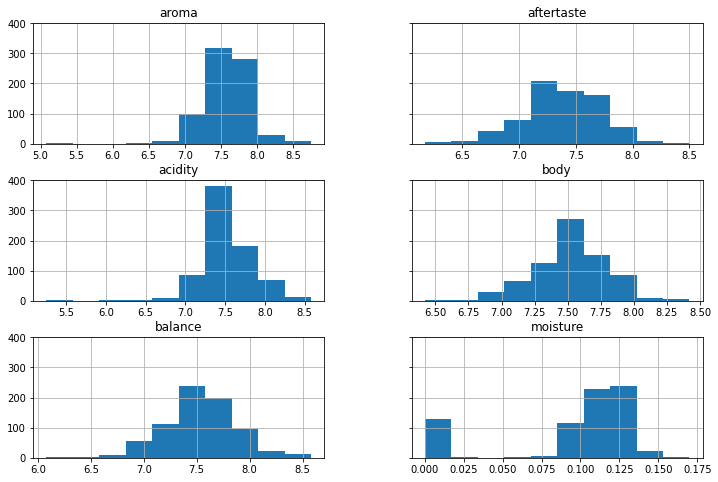

In [25]:
# Plot histograms
X_train.hist(figsize=(12,8), sharey= True)
plt.show()

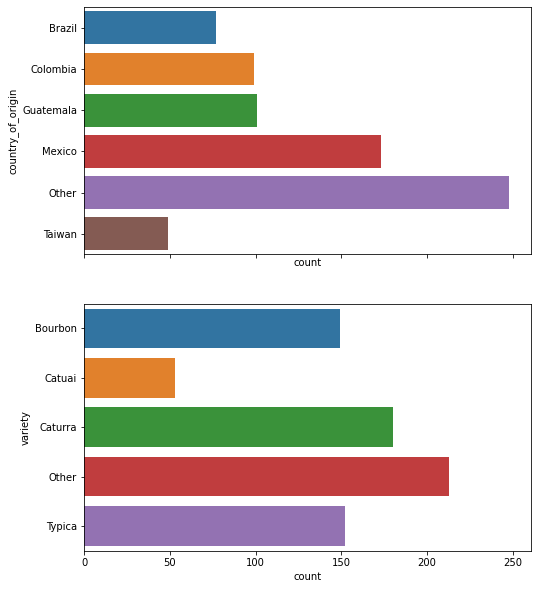

In [27]:
# Plot categories countplot
cats = X_train.select_dtypes('category')
fig, ax = plt.subplots(2,1, figsize=(8,10), sharex=True)
axs = ax.flatten()
for i in range(len(axs)):
    sns.countplot(data=cats, y=cats.columns.to_list()[i], ax= axs[i] )

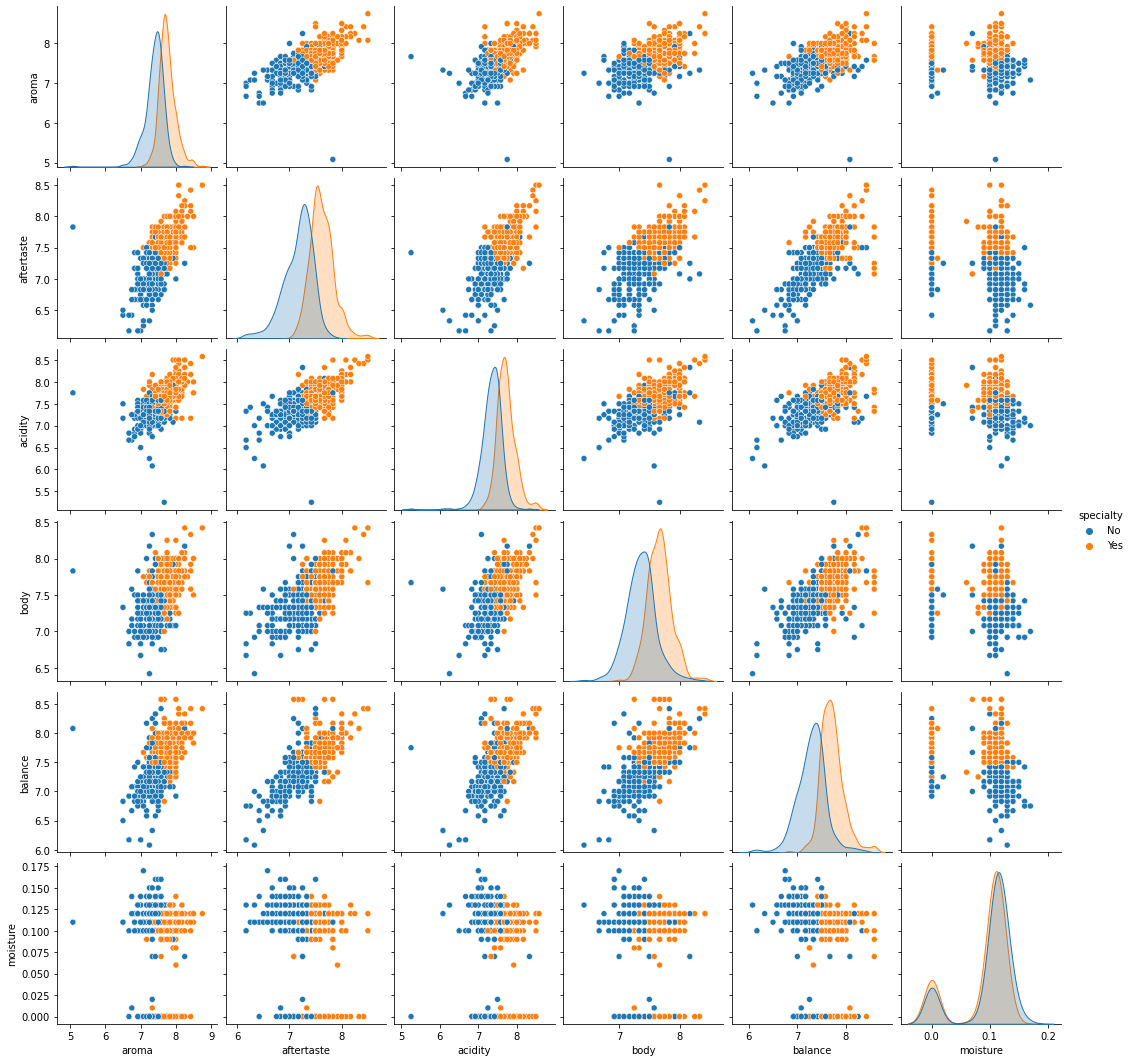

In [ ]:
# Plot pairplot
sns.pairplot(data=df_train, hue= 'specialty')
plt.show()

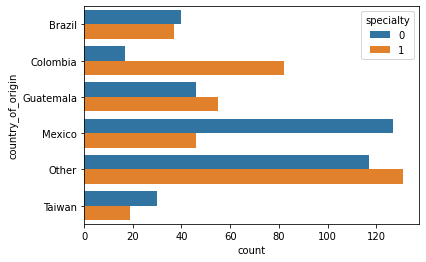

In [28]:
# Plot category effect
sns.countplot(data= df_train, y= 'country_of_origin', hue= 'specialty')
plt.show()

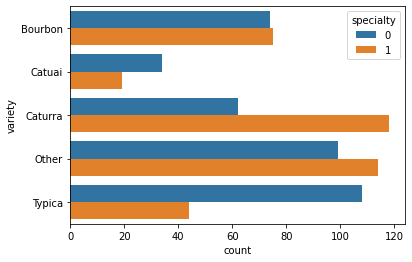

In [29]:
# Plot category effect
sns.countplot(data= df_train, y= 'variety', hue= 'specialty')
plt.show()

In [30]:
# Calculate correlation
X_train.corr().style.background_gradient(cmap= 'Blues')

,aroma,aftertaste,acidity,body,balance,moisture
aroma,1.000000,0.675971,0.586244,0.523622,0.588692,-0.038481
aftertaste,0.675971,1.000000,0.680573,0.668489,0.768697,-0.139767
acidity,0.586244,0.680573,1.000000,0.604851,0.638995,-0.084052
body,0.523622,0.668489,0.604851,1.000000,0.688455,-0.178684
balance,0.588692,0.768697,0.638995,0.688455,1.000000,-0.197440
moisture,-0.038481,-0.139767,-0.084052,-0.178684,-0.197440,1.000000


In [34]:
df_train

,country_of_origin,variety,aroma,aftertaste,acidity,body,balance,moisture,specialty
780,Brazil,Other,7.25,7.58,7.58,7.25,7.92,0.00,0
1293,Other,Other,7.00,6.83,7.17,7.00,7.17,0.11,0
1223,Mexico,Caturra,7.25,7.00,6.83,7.58,7.08,0.13,0
157,Brazil,Catuai,8.50,7.50,7.75,7.50,7.83,0.11,1
520,Mexico,Bourbon,7.50,7.50,7.50,7.58,7.58,0.11,1
...,...,...,...,...,...,...,...,...,...
428,Colombia,Caturra,7.83,7.67,7.33,7.67,7.67,0.11,1
236,Guatemala,Bourbon,7.58,7.67,8.00,7.75,7.67,0.10,1
129,Guatemala,Bourbon,7.75,7.58,8.00,7.92,7.75,0.10,1
145,Colombia,Other,7.83,7.58,7.92,7.67,7.83,0.00,1


In [35]:
# We create the binary variables
dummies = pd.get_dummies(df_train[['country_of_origin', 'variety']], drop_first = True)

In [36]:
# Add the binary variables to the DataFrame & we delete the original vairable species, country_of_origin, variety
df = pd.concat([df_train, dummies], axis = 1)
df = df.drop(columns=['country_of_origin', 'variety'])
df


,aroma,aftertaste,acidity,body,balance,moisture,specialty,country_of_origin_Colombia,country_of_origin_Guatemala,country_of_origin_Mexico,country_of_origin_Other,country_of_origin_Taiwan,variety_Catuai,variety_Caturra,variety_Other,variety_Typica
780,7.25,7.58,7.58,7.25,7.92,0.00,0,0,0,0,0,0,0,0,1,0
1293,7.00,6.83,7.17,7.00,7.17,0.11,0,0,0,0,1,0,0,0,1,0
1223,7.25,7.00,6.83,7.58,7.08,0.13,0,0,0,1,0,0,0,1,0,0
157,8.50,7.50,7.75,7.50,7.83,0.11,1,0,0,0,0,0,1,0,0,0
520,7.50,7.50,7.50,7.58,7.58,0.11,1,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
428,7.83,7.67,7.33,7.67,7.67,0.11,1,1,0,0,0,0,0,1,0,0
236,7.58,7.67,8.00,7.75,7.67,0.10,1,0,1,0,0,0,0,0,0,0
129,7.75,7.58,8.00,7.92,7.75,0.10,1,0,1,0,0,0,0,0,0,0
145,7.83,7.58,7.92,7.67,7.83,0.00,1,1,0,0,0,0,0,0,1,0


In [37]:
# Again, train and test
X = df.drop(["specialty"], axis=1)
y = df["specialty"]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123, stratify=y)
df_train = pd.concat([X_train, y_train], axis=1)

In [38]:
# 3.2 Perform model fit
rforest = RandomForestClassifier()
rforest.fit(X_train, y_train)
print(f'Accuracy: {rforest.score(X_train, y_train):.3f}')

Accuracy: 1.000


              precision    recall  f1-score   support

           0       0.97      0.93      0.95        94
           1       0.93      0.97      0.95        93

    accuracy                           0.95       187
   macro avg       0.95      0.95      0.95       187
weighted avg       0.95      0.95      0.95       187



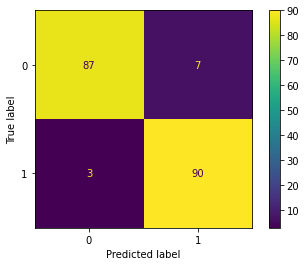

In [39]:
# 3.4 Calculate metrics on model
y_pred = rforest.predict(X_test)
print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels= rforest.classes_).plot()
plt.show()

## Conclusion: a good prediction model was obtained on the data set with an accuracy of 95%. In turn, it has a predictive power of 95% for positive and/or negative cases. 

In [40]:
X = X.sort_values('balance', ascending=False)
X

,aroma,aftertaste,acidity,body,balance,moisture,country_of_origin_Colombia,country_of_origin_Guatemala,country_of_origin_Mexico,country_of_origin_Other,country_of_origin_Taiwan,variety_Catuai,variety_Caturra,variety_Other,variety_Typica
65,8.00,7.83,7.83,7.67,8.58,0.09,0,0,0,1,0,0,1,0,0
222,7.67,7.67,7.42,7.83,8.58,0.12,1,0,0,0,0,0,0,1,0
386,7.58,7.25,7.75,7.75,8.58,0.12,1,0,0,0,0,0,1,0,0
598,7.58,7.17,7.33,7.25,8.58,0.10,1,0,0,0,0,0,1,0,0
444,7.58,7.08,7.33,7.58,8.58,0.07,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1300,6.50,6.42,7.17,7.33,6.50,0.11,0,0,1,0,0,0,0,0,0
1269,7.33,6.50,6.08,7.58,6.33,0.12,0,0,0,1,0,0,0,1,0
1303,6.67,6.17,6.67,6.83,6.17,0.10,0,0,0,1,0,1,0,0,0
1305,7.00,6.17,6.50,6.67,6.17,0.10,0,0,0,1,0,1,0,0,0


Feature: 0, Score: 0.13956
Feature: 1, Score: 0.20514
Feature: 2, Score: 0.17093
Feature: 3, Score: 0.13591
Feature: 4, Score: 0.21233
Feature: 5, Score: 0.04407
Feature: 6, Score: 0.01730
Feature: 7, Score: 0.00894
Feature: 8, Score: 0.01500
Feature: 9, Score: 0.00946
Feature: 10, Score: 0.00418
Feature: 11, Score: 0.00693
Feature: 12, Score: 0.01033
Feature: 13, Score: 0.00909
Feature: 14, Score: 0.01083


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


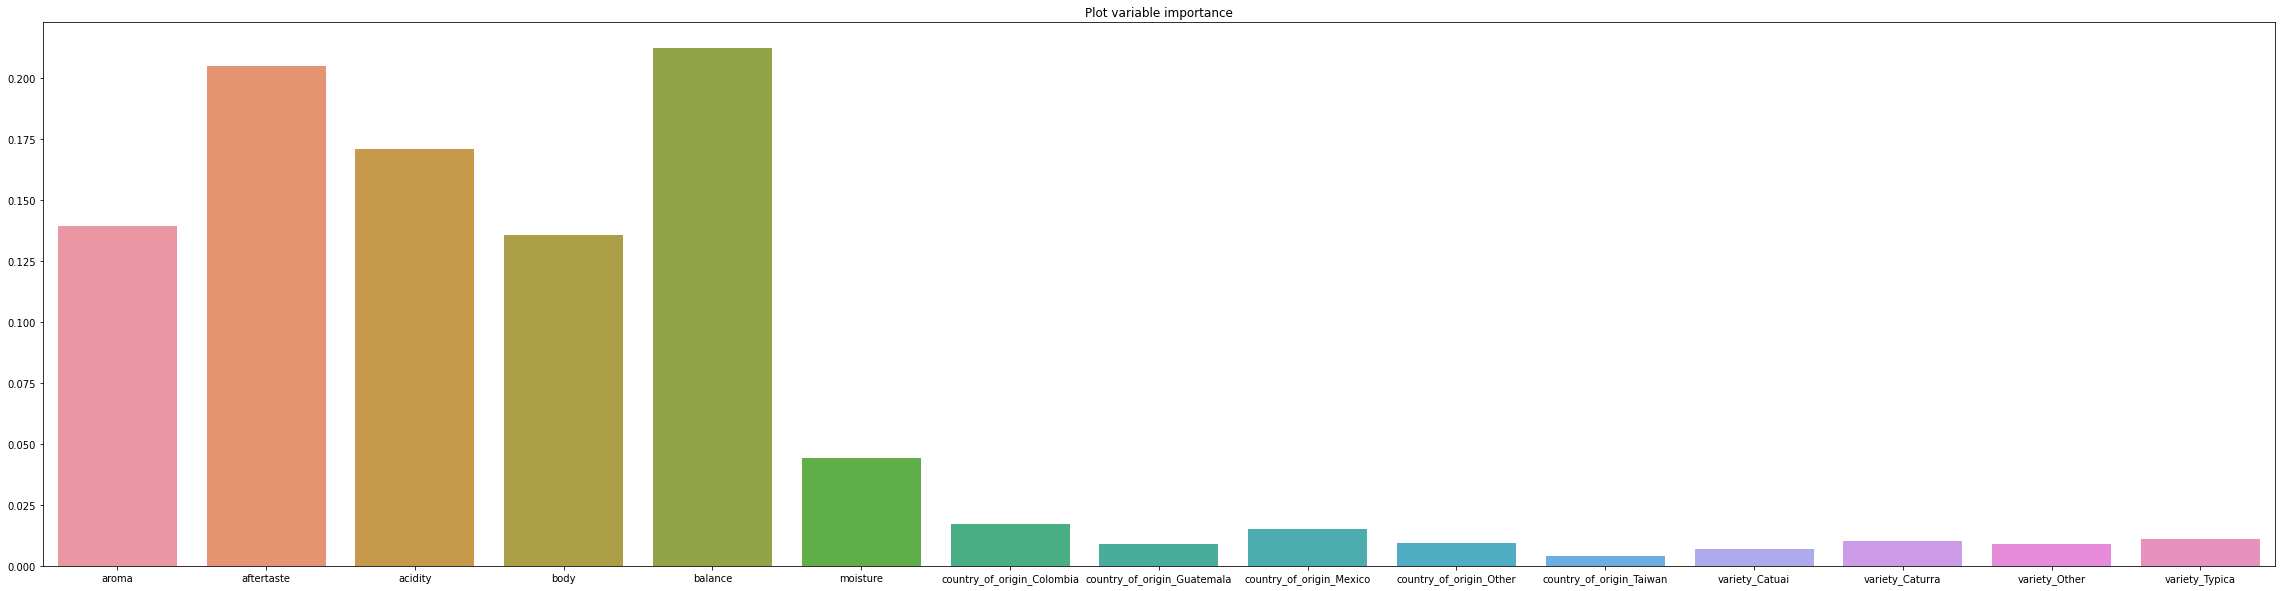

In [41]:
# Plot variable importance

importance = rforest.feature_importances_

for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))

# graficamos la importancia de las variables

plt.figure(figsize=(40,10))
X = X.sort_values('balance', ascending=True)
columns = X.columns
sns.barplot(columns, importance)
plt.title('Plot variable importance')
plt.show()

In [42]:
# Save the model as a pickle
filename = '../models/coffee_model.pkl'
pickle.dump(rforest, open(filename,'wb'))

FileNotFoundError: ignored

In [43]:
# Create a set for testing
example = ['Other', 'Other', 7.42, 7.33, 7.42, 7.25, 7.33, 0]
example_df = pd.DataFrame(np.array(example).reshape(1,8), columns= X_train.columns)

ValueError: ignored

In [44]:
# Predcit based on the set
rforest.predict(example_df)

NameError: ignored